In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")
library(stringr)

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [11]:
no <-1:4
name <- c("Apple","Banana","Peach","Berry")
price <- c(500,200,200,50)
qty <- c(5,4,3,2)

fruit<-data.frame(번호=no,제품=name,금액=price,수량=qty)
fruit
ls()


번호 제품   금액 수량
1 1    Apple  500  5   
2 2    Banana 200  4   
3 3    Peach  200  3   
4 4    Berry   50  2

[1] "fruit" "name"  "no"    "price" "qty"

In [19]:
# 메모리 형태로 파일 보관
#save(no,fruit,name,file="../Data/testFruit.hwp")

rm(no,fruit,name)
ls()
load("../Data/testFruit.hwp")

[1] "price" "qty"

In [21]:
no

[1] 1 2 3 4

In [23]:
fruit

번호 제품   금액 수량
1 1    Apple  500  5   
2 2    Banana 200  4   
3 3    Peach  200  3   
4 4    Berry   50  2

In [25]:
ls()


[1] "fruit" "name"  "no"    "price" "qty"

In [31]:
#fruit 를 csv 로 저장하기
write.csv(fruit,"../Data/fruit.csv",row.names =F)

In [33]:
read.csv("../Data/fruit.csv")

번호 제품   금액 수량
1 1    Apple  500  5   
2 2    Banana 200  4   
3 3    Peach  200  3   
4 4    Berry   50  2

### 세계 GDP 순위 데이터 정제 및 차트 만들기


In [58]:
GDP_ranking <- read.csv("../Data/GDP.csv")
head(GDP_ranking)

X   Gross.domestic.product.2018 X.1 X.2           X.3          X.4
1                                 NA                                
2                                 NA                (millions of    
3     Ranking                     NA  Economy       US dollars)     
4                                 NA                                
5 USA 1                           NA  United States  20,494,100     
6 CHN 2                           NA  China          13,608,152

In [59]:
GDP2<- GDP_ranking[-(1:4),-c(3,ncol(GDP_ranking))]



In [64]:
#GDP2
# 상위 15개국만 선별한다. 
g15<-GDP2[1:15,]; rownames(g15)<-1:15

In [70]:
#g15
# 컬럼 이름 정의 : Code, Ranking, Nation, GDP

colnames(g15)<-c("Code","Ranking","Nation","GDP")
#g15
# rownames 새로 구성하기 
rownames(g15) <-c(1:15) # c() 로 하면 초기화 됨. 
g15

Code Ranking Nation             GDP         
1  USA  1       United States       20,494,100 
2  CHN  2       China               13,608,152 
3  JPN  3       Japan               4,970,916  
4  DEU  4       Germany             3,996,759  
5  GBR  5       United Kingdom      2,825,208  
6  FRA  6       France              2,777,535  
7  IND  7       India               2,726,323  
8  ITA  8       Italy               2,073,902  
9  BRA  9       Brazil              1,868,626  
10 CAN  10      Canada              1,712,510  
11 RUS  11      Russian Federation  1,657,554  
12 KOR  12      Korea, Rep.         1,619,424  
13 AUS  13      Australia           1,432,195  
14 ESP  14      Spain               1,426,189  
15 MEX  15      Mexico              1,223,809

In [80]:
g15$GDP<-as.double(str_remove_all(g15$GDP,",")); head(g15,6);

Code Ranking Nation         GDP     
1 USA  1       United States  20494100
2 CHN  2       China          13608152
3 JPN  3       Japan           4970916
4 DEU  4       Germany         3996759
5 GBR  5       United Kingdom  2825208
6 FRA  6       France          2777535

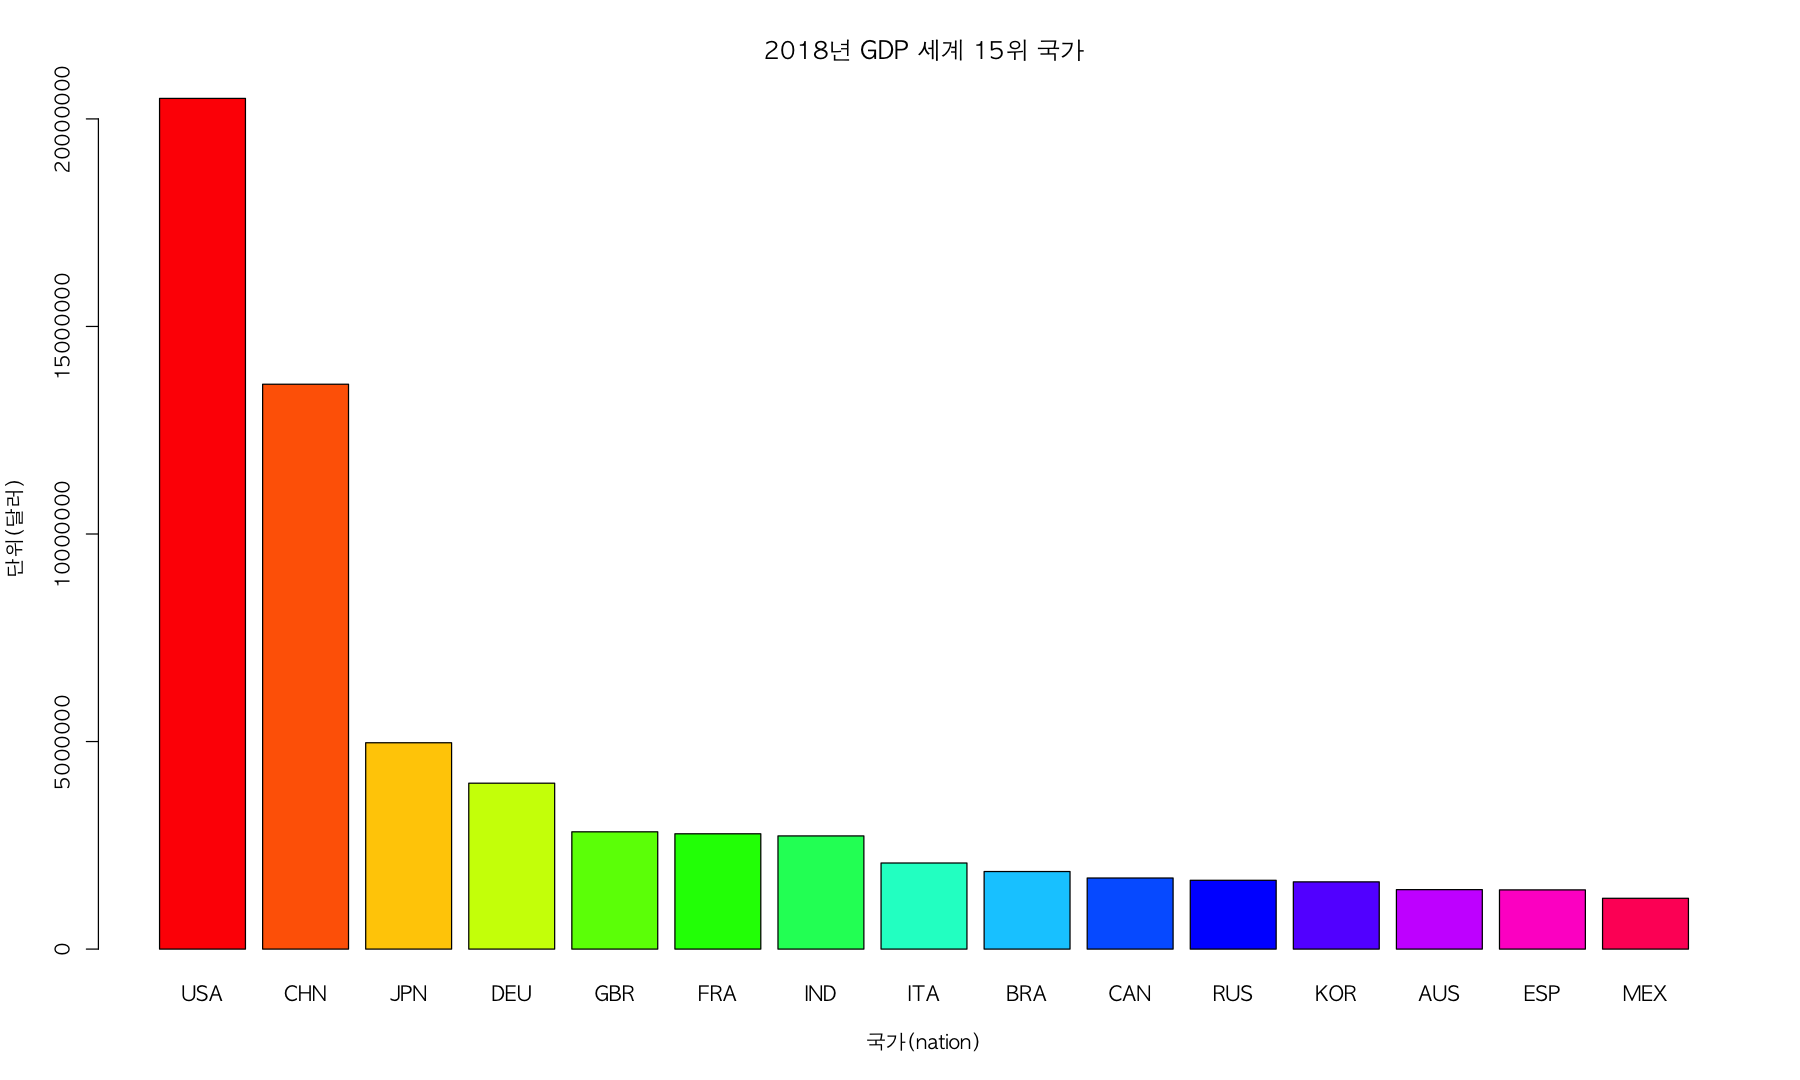

In [101]:
options(scipen=100) # 지수 없애기
par(family ="AppleGothic",bg ='white')
barplot(
    g15$GDP, # data
    main = "2018년 GDP 세계 15위 국가",  #main title
    xlab = "국가(nation)", # x axis 이름
    ylab = "단위(달러)",
    col = rainbow(nrow(g15)),
    names = g15$Code,
    #cex.names =0.5
    
)


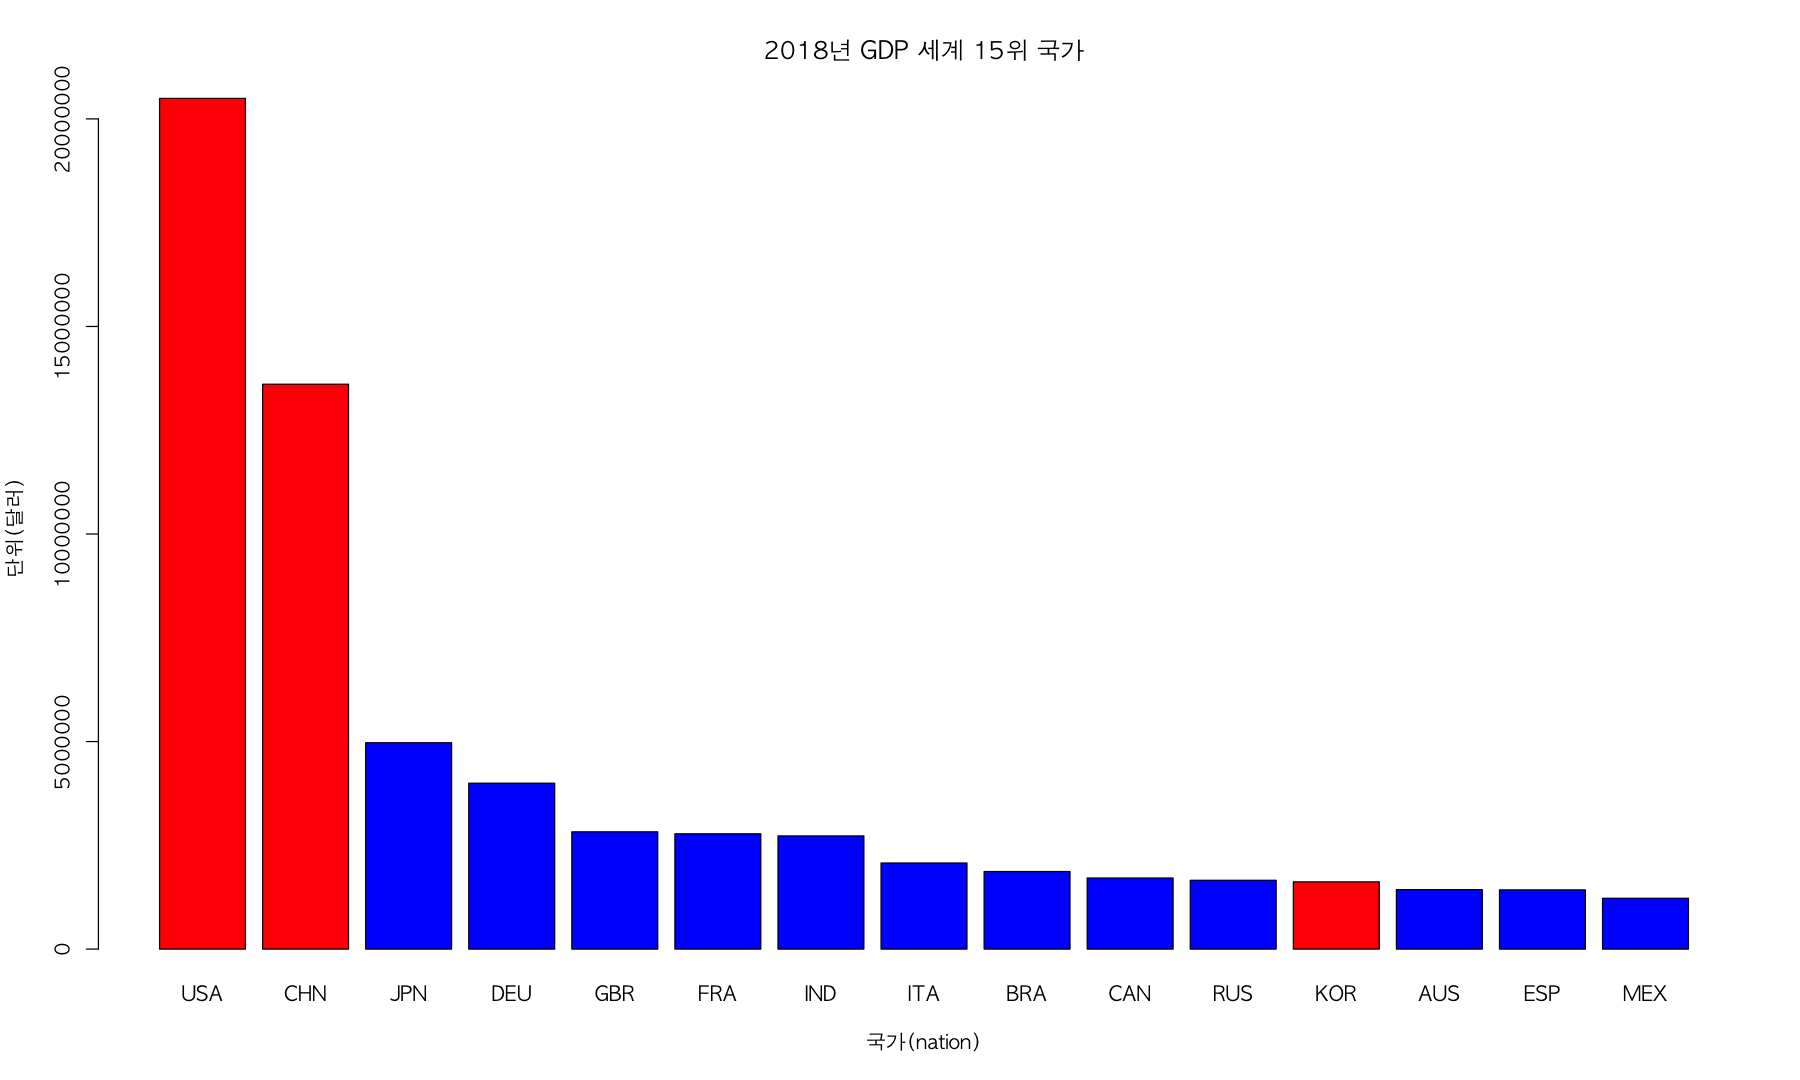

In [116]:
# 한국에 실정을 차트로 보여주겠다! 1등2등 빼면 만만함. 
# 미중한 은 빨간색으로 나머지 국가는 파란색으로 표현
options(scipen=100) # 지수 없애기
par(family ="AppleGothic",bg ='white')
barplot(
    g15$GDP, # data
    main = "2018년 GDP 세계 15위 국가",  #main title
    xlab = "국가(nation)", # x axis 이름
    ylab = "단위(달러)",
    col = ifelse(g15$Code==c("USA","CHN","KOR"),"red","blue"),
    names = g15$Code,
    #cex.names =0.5
    
)

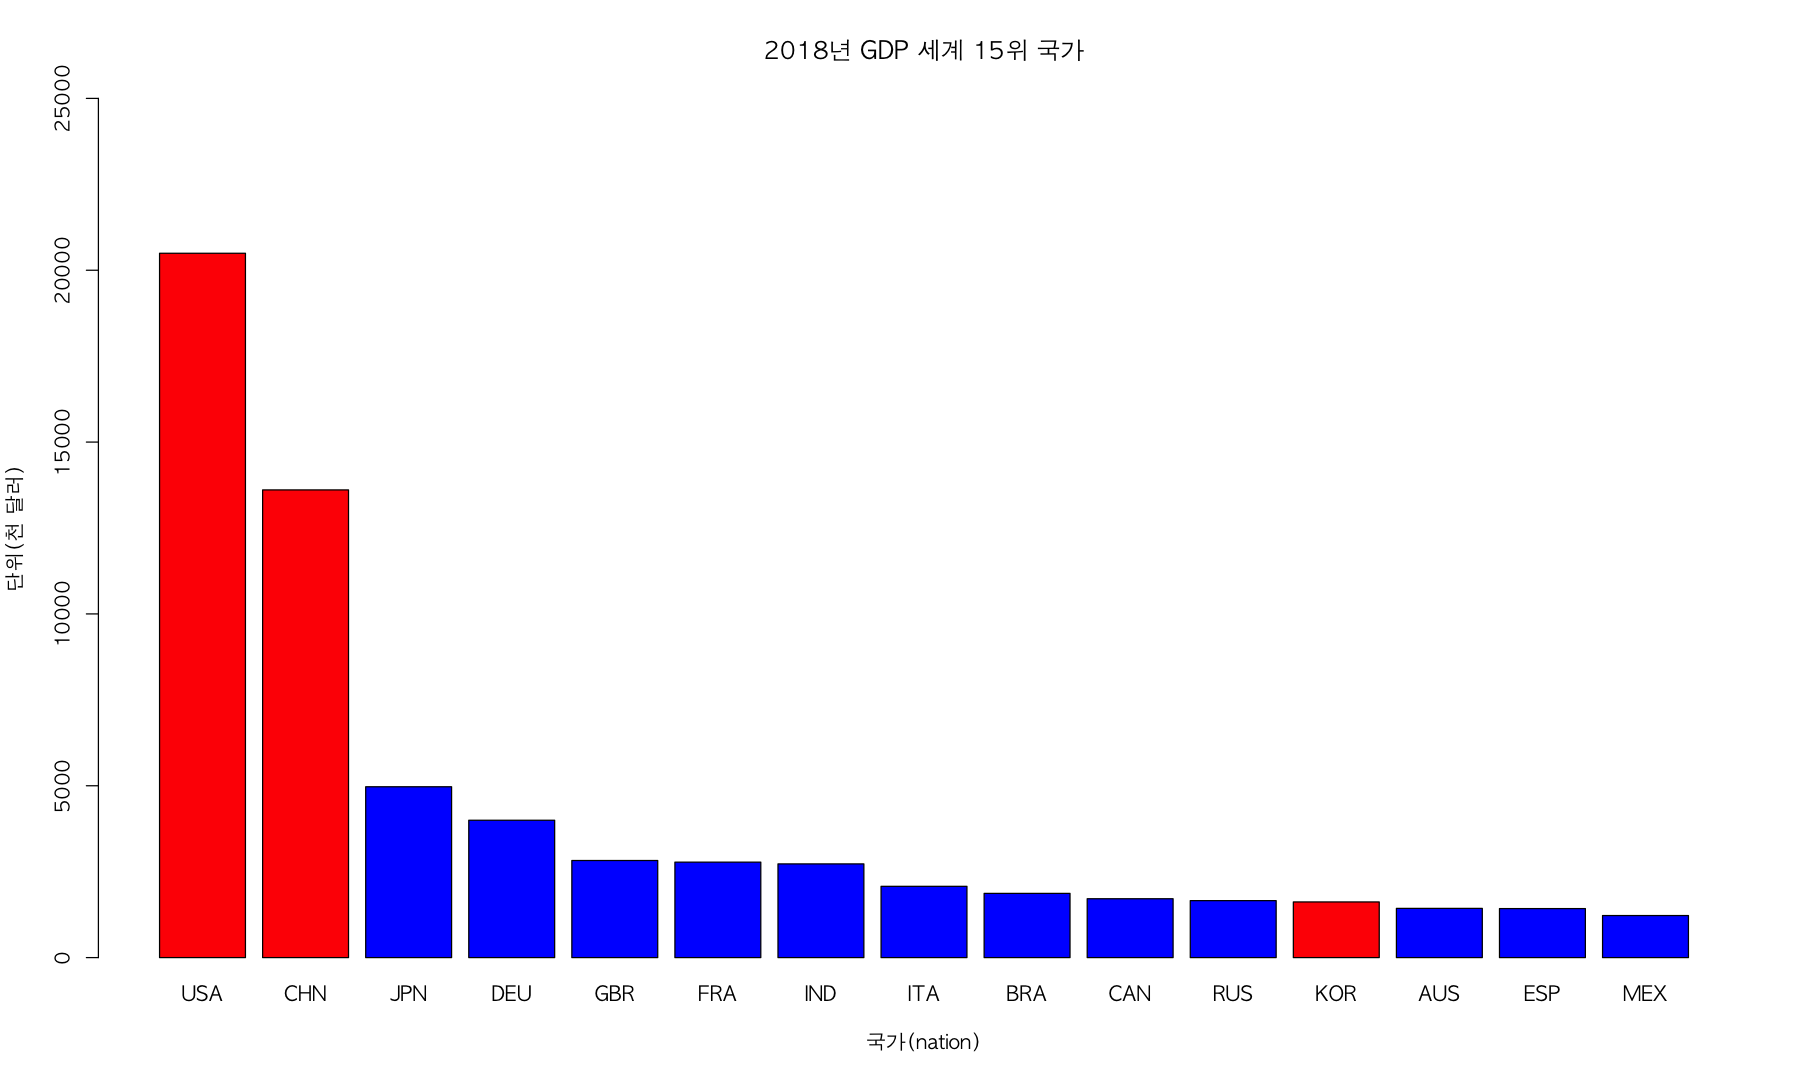

In [119]:
#단위를 천단위로 표시하기
options(scipen=100) # 지수 없애기
par(family ="AppleGothic",bg ='white')
barplot(
    g15$GDP/1000, # data
    main = "2018년 GDP 세계 15위 국가",  #main title
    xlab = "국가(nation)", # x axis 이름
    ylab = "단위(천 달러)",
    col = ifelse(g15$Code==c("USA","CHN","KOR"),"red","blue"),
    names = g15$Code,
    #cex.names =0.5
    ylim =c(0,25000)
)

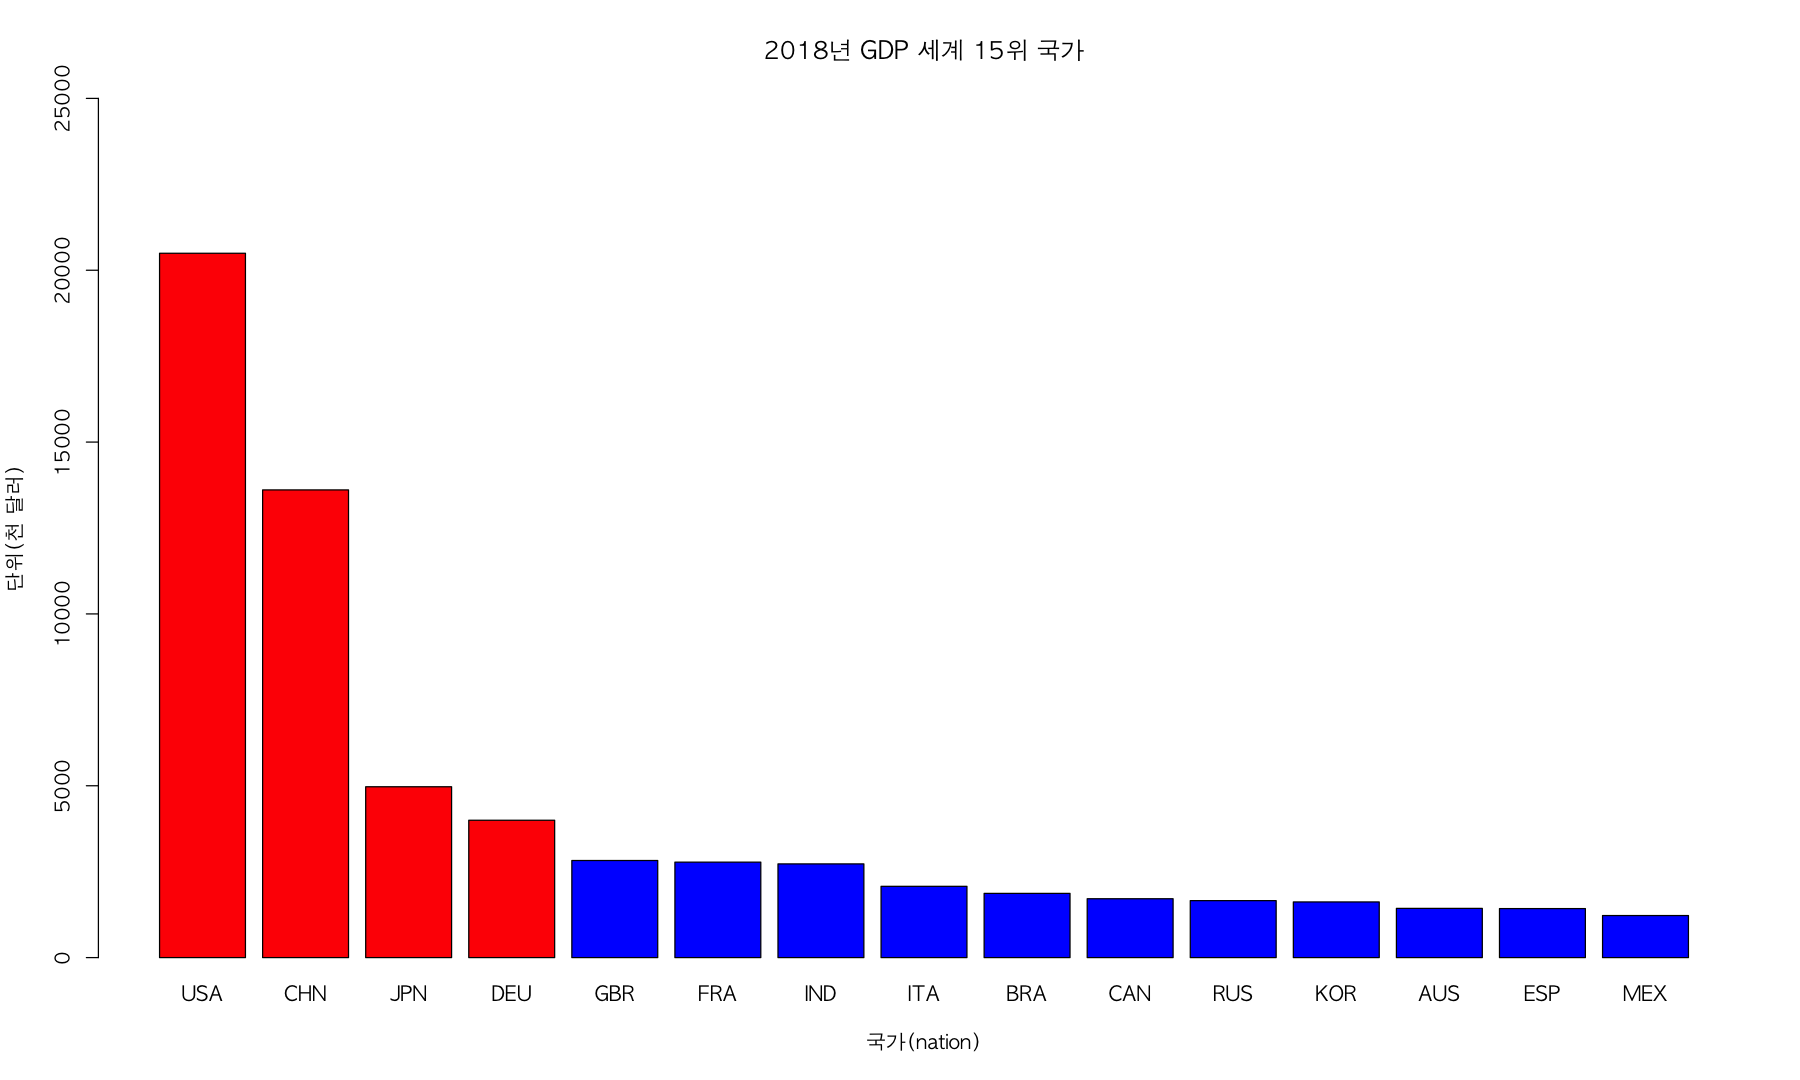

In [121]:
# GDP 가 3000000 이상인 국가만 빨간색으로 표시하기
#단위를 천단위로 표시하기
options(scipen=100) # 지수 없애기
par(family ="AppleGothic",bg ='white')
barplot(
    g15$GDP/1000, # data
    main = "2018년 GDP 세계 15위 국가",  #main title
    xlab = "국가(nation)", # x axis 이름
    ylab = "단위(천 달러)",
    col = ifelse(g15$GDP >= 3000000,"red","blue"),
    names = g15$Code,
    #cex.names =0.5
    ylim =c(0,25000)
)

---
# 데이터처리


In [365]:
# 데이터 정렬
# R 로도 머신러닝 할수있다 훨씬 빠르고 이쁘다 파이썬보다. 
library(dplyr)

In [125]:
#install.packages("dplyr")

In [126]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [129]:
# Sepal.Length 기준으로 오름차순 정렬하기 
#head(iris) # iris의 정렬순서는 Species 이다.  정렬의 기준은 무조건 target column 이다. 
head(arrange(iris,Sepal.Length))

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 4.3          3.0         1.1          0.1         setosa 
2 4.4          2.9         1.4          0.2         setosa 
3 4.4          3.0         1.3          0.2         setosa 
4 4.4          3.2         1.3          0.2         setosa 
5 4.5          2.3         1.3          0.3         setosa 
6 4.6          3.1         1.5          0.2         setosa

In [131]:
# Sepal.Length 기준으로 오름차순 정렬후 1열과 2열만 보기
arrange(iris[,1:2],Sepal.Length)

Sepal.Length Sepal.Width
1   4.3          3.0        
2   4.4          2.9        
3   4.4          3.0        
4   4.4          3.2        
5   4.5          2.3        
6   4.6          3.1        
7   4.6          3.4        
8   4.6          3.6        
9   4.6          3.2        
10  4.7          3.2        
11  4.7          3.2        
12  4.8          3.4        
13  4.8          3.0        
14  4.8          3.4        
15  4.8          3.1        
16  4.8          3.0        
17  4.9          3.0        
18  4.9          3.1        
19  4.9          3.1        
20  4.9          3.6        
21  4.9          2.4        
22  4.9          2.5        
23  5.0          3.6        
24  5.0          3.4        
25  5.0          3.0        
26  5.0          3.4        
27  5.0          3.2        
28  5.0          3.5        
29  5.0          3.5        
30  5.0          3.3        
... ...          ...        
121 6.6          2.9        
122 6.6          3.0        
123 6.7          3.1        
124 6.7          3.0        
125 6.7          3.1        
126 6.7          2.5        
127 6.7          3.3        
128 6.7          3.1        
129 6.7          3.3        
130 6.7          3.0        
131 6.8          2.8        
132 6.8          3.0        
133 6.8          3.2        
134 6.9          3.1        
135 6.9          3.2        
136 6.9          3.1        
137 6.9          3.1        
138 7.0          3.2        
139 7.1          3.0        
140 7.2          3.6        
141 7.2          3.2        
142 7.2          3.0        
143 7.3          2.9        
144 7.4          2.8        
145 7.6          3.0        
146 7.7          3.8        
147 7.7          2.6        
148 7.7          2.8        
149 7.7          3.0        
150 7.9          3.8

In [136]:
# Sepal.Length 기준으로 정렬후 동일한 크기를 가진 데이터 발생시 Petal.Length 기준으로 오름차순 정렬하기 

head(arrange(iris, Sepal.Length,Petal.Length))

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 4.3          3.0         1.1          0.1         setosa 
2 4.4          3.0         1.3          0.2         setosa 
3 4.4          3.2         1.3          0.2         setosa 
4 4.4          2.9         1.4          0.2         setosa 
5 4.5          2.3         1.3          0.3         setosa 
6 4.6          3.6         1.0          0.2         setosa

In [141]:
#Sepal.Length 기준으로 내림차순 정렬
arrange(iris,desc(Sepal.Length))

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
1   7.9          3.8         6.4          2.0         virginica 
2   7.7          3.8         6.7          2.2         virginica 
3   7.7          2.6         6.9          2.3         virginica 
4   7.7          2.8         6.7          2.0         virginica 
5   7.7          3.0         6.1          2.3         virginica 
6   7.6          3.0         6.6          2.1         virginica 
7   7.4          2.8         6.1          1.9         virginica 
8   7.3          2.9         6.3          1.8         virginica 
9   7.2          3.6         6.1          2.5         virginica 
10  7.2          3.2         6.0          1.8         virginica 
11  7.2          3.0         5.8          1.6         virginica 
12  7.1          3.0         5.9          2.1         virginica 
13  7.0          3.2         4.7          1.4         versicolor
14  6.9          3.1         4.9          1.5         versicolor
15  6.9          3.2         5.7          2.3         virginica 
16  6.9          3.1         5.4          2.1         virginica 
17  6.9          3.1         5.1          2.3         virginica 
18  6.8          2.8         4.8          1.4         versicolor
19  6.8          3.0         5.5          2.1         virginica 
20  6.8          3.2         5.9          2.3         virginica 
21  6.7          3.1         4.4          1.4         versicolor
22  6.7          3.0         5.0          1.7         versicolor
23  6.7          3.1         4.7          1.5         versicolor
24  6.7          2.5         5.8          1.8         virginica 
25  6.7          3.3         5.7          2.1         virginica 
26  6.7          3.1         5.6          2.4         virginica 
27  6.7          3.3         5.7          2.5         virginica 
28  6.7          3.0         5.2          2.3         virginica 
29  6.6          2.9         4.6          1.3         versicolor
30  6.6          3.0         4.4          1.4         versicolor
... ...          ...         ...          ...         ...       
121 5.0          3.0         1.6          0.2         setosa    
122 5.0          3.4         1.6          0.4         setosa    
123 5.0          3.2         1.2          0.2         setosa    
124 5.0          3.5         1.3          0.3         setosa    
125 5.0          3.5         1.6          0.6         setosa    
126 5.0          3.3         1.4          0.2         setosa    
127 5.0          2.0         3.5          1.0         versicolor
128 5.0          2.3         3.3          1.0         versicolor
129 4.9          3.0         1.4          0.2         setosa    
130 4.9          3.1         1.5          0.1         setosa    
131 4.9          3.1         1.5          0.2         setosa    
132 4.9          3.6         1.4          0.1         setosa    
133 4.9          2.4         3.3          1.0         versicolor
134 4.9          2.5         4.5          1.7         virginica 
135 4.8          3.4         1.6          0.2         setosa    
136 4.8          3.0         1.4          0.1         setosa    
137 4.8          3.4         1.9          0.2         setosa    
138 4.8          3.1         1.6          0.2         setosa    
139 4.8          3.0         1.4          0.3         setosa    
140 4.7          3.2         1.3          0.2         setosa    
141 4.7          3.2         1.6          0.2         setosa    
142 4.6          3.1         1.5          0.2         setosa    
143 4.6          3.4         1.4          0.3         setosa    
144 4.6          3.6         1.0          0.2         setosa    
145 4.6          3.2         1.4          0.2         setosa    
146 4.5          2.3         1.3          0.3         setosa    
147 4.4          2.9         1.4          0.2         setosa    
148 4.4          3.0         1.3          0.2         setosa    
149 4.4          3.2         1.3          0.2         setosa    
150 4.3          3.0         1.1       

In [149]:
# Sampling(중복값을 허용하지 않음)
a<- c(1,1,1,2)
sample(unique(a),1)
# 검증 test, 학습 할때의 데이터와 검증할때의 데이터가 달라야 할때 샘플링을 사용한다. 시험결과가 예측력이다. #


[1] 2

In [155]:
# 범위 체크
nrow(iris) #150
samp<-sample(1:nrow(iris), nrow(iris)*0.7) # iris index(rownames) sampling
irisTrain <- iris[samp,]
samp
head(irisTrain)

[1] 150

[1]  19  12  67  55  35  92 107  85  88  30  75  14   8  87  59  72  56  36
 [19] 126  76 137  77  51 129  84  45  90 140  32  40 128 116 136 103  94 110
 [37]  80 100 131  43  69 124 135 101 109  63  27 102  95  18 133 123  24  73
 [55]  78  86 150 121  23   2  62 147 125   6  17 113  44  79 114  74   3  96
 [73] 115  64 111   1 142  97  70  98  15  41 139  22  66  11  91  46   4 134
 [91] 132  60  58  25  89  81   5  49  99  28  26   9 149 112   7

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
19 5.7          3.8         1.7          0.3         setosa    
12 4.8          3.4         1.6          0.2         setosa    
67 5.6          3.0         4.5          1.5         versicolor
55 6.5          2.8         4.6          1.5         versicolor
35 4.9          3.1         1.5          0.2         setosa    
92 6.1          3.0         4.6          1.4         versicolor

In [163]:
# sampling 은 모집단의 특성을 닮아야한다
table(irisTrain$Species)  #빈도수가 species 와 동일하지 않음 -> 공부를 많이한 종은 예측확률이 더 좋아진다. 



    setosa versicolor  virginica 
        34         39         32 

In [173]:
# 특성별 샘플링
samp<- c(sample(1:50,35),sample(51:100,35),sample(101:150,35))
irisTrain<-iris[samp,]
table(irisTrain$Species)


    setosa versicolor  virginica 
        35         35         35 

In [176]:
nrow(irisTrain) #105

[1] 105

In [184]:
irisTest<-iris[-samp,] # R의 묘미 - 하면 빼고 나와준다는것!
nrow(irisTest)

[1] 45

In [186]:
# 데이터 개수는 맞추었는데 내용은 비슷할까?
summary(irisTrain); summary(irisTest) # 각 칼럼의 평균이 비슷하면 내용이 비슷하다. 

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.700   Median :3.000   Median :4.200   Median :1.300  
 Mean   :5.846   Mean   :3.052   Mean   :3.749   Mean   :1.199  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.000   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :35  
 versicolor:35  
 virginica :35  
                
                
                

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width        Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.10   Min.   :0.1   setosa    :15  
 1st Qu.:5.200   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.3   versicolor:15  
 Median :5.900   Median :3.000   Median :4.40   Median :1.3   virginica :15  
 Mean   :5.838   Mean   :3.069   Mean   :3.78   Mean   :1.2                  
 3rd Qu.:6.300   3rd Qu.:3.300   3rd Qu.:5.10   3rd Qu.:1.8                  
 Max.   :7.400   Max.   :4.400   Max.   :6.30   Max.   :2.5                  

In [190]:
set.seed(1234)
samp <- c(sample(1:50,35),sample(51:100,35),sample(101:150,35))
irisTrain <- iris[samp,]
irisTest <- iris[-samp,]
summary(irisTrain); summary(irisTest)
head(irisTrain)


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
28 5.2          3.5         1.5          0.2         setosa 
16 5.7          4.4         1.5          0.4         setosa 
22 5.1          3.7         1.5          0.4         setosa 
37 5.5          3.5         1.3          0.2         setosa 
44 5.0          3.5         1.6          0.6         setosa 
9  4.4          2.9         1.4          0.2         setosa

In [199]:
# 모집단에서 필요한 데이터만 추출하기 -> subset 으로 추출

#iris에서 Species 가 setosa 인것만 추출하여 iris_setosa라는 데이터 프레임 만들기

iris_setosa<- subset(iris, Species == 'setosa')
str(iris_setosa) # factor 가 정리가 안되어있음  나중에 히스토그램 만들때 빈칸이 보이게 됨
# factor 조정 
iris_setosa$Species <-factor(iris_setosa$Species); 
str(iris_setosa)


'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [217]:
# iris 에서 Species가 versicolor인 것 만 추출하여 iris_versicolor라는 데이터 프레임 만들기
iris_versicolor<-subset(iris, Species == "versicolor")
str(iris_versicolor)
rownames(iris_versicolor) <- c(1:nrow(iris_versicolor))
iris_versicolor
iris_versicolor$Speicies <-factor(iris_versicolor$Species) # type 을 바꿀때는 as.factor 로 리펙터링을 해준다. 
str(iris_versicolor)


'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...


Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
1  7.0          3.2         4.7          1.4         versicolor
2  6.4          3.2         4.5          1.5         versicolor
3  6.9          3.1         4.9          1.5         versicolor
4  5.5          2.3         4.0          1.3         versicolor
5  6.5          2.8         4.6          1.5         versicolor
6  5.7          2.8         4.5          1.3         versicolor
7  6.3          3.3         4.7          1.6         versicolor
8  4.9          2.4         3.3          1.0         versicolor
9  6.6          2.9         4.6          1.3         versicolor
10 5.2          2.7         3.9          1.4         versicolor
11 5.0          2.0         3.5          1.0         versicolor
12 5.9          3.0         4.2          1.5         versicolor
13 6.0          2.2         4.0          1.0         versicolor
14 6.1          2.9         4.7          1.4         versicolor
15 5.6          2.9         3.6          1.3         versicolor
16 6.7          3.1         4.4          1.4         versicolor
17 5.6          3.0         4.5          1.5         versicolor
18 5.8          2.7         4.1          1.0         versicolor
19 6.2          2.2         4.5          1.5         versicolor
20 5.6          2.5         3.9          1.1         versicolor
21 5.9          3.2         4.8          1.8         versicolor
22 6.1          2.8         4.0          1.3         versicolor
23 6.3          2.5         4.9          1.5         versicolor
24 6.1          2.8         4.7          1.2         versicolor
25 6.4          2.9         4.3          1.3         versicolor
26 6.6          3.0         4.4          1.4         versicolor
27 6.8          2.8         4.8          1.4         versicolor
28 6.7          3.0         5.0          1.7         versicolor
29 6.0          2.9         4.5          1.5         versicolor
30 5.7          2.6         3.5          1.0         versicolor
31 5.5          2.4         3.8          1.1         versicolor
32 5.5          2.4         3.7          1.0         versicolor
33 5.8          2.7         3.9          1.2         versicolor
34 6.0          2.7         5.1          1.6         versicolor
35 5.4          3.0         4.5          1.5         versicolor
36 6.0          3.4         4.5          1.6         versicolor
37 6.7          3.1         4.7          1.5         versicolor
38 6.3          2.3         4.4          1.3         versicolor
39 5.6          3.0         4.1          1.3         versicolor
40 5.5          2.5         4.0          1.3         versicolor
41 5.5          2.6         4.4          1.2         versicolor
42 6.1          3.0         4.6          1.4         versicolor
43 5.8          2.6         4.0          1.2         versicolor
44 5.0          2.3         3.3          1.0         versicolor
45 5.6          2.7         4.2          1.3         versicolor
46 5.7          3.0         4.2          1.2         versicolor
47 5.7          2.9         4.2          1.3         versicolor
48 6.2          2.9         4.3          1.3         versicolor
49 5.1          2.5         3.0          1.1         versicolor
50 5.7          2.8         4.1          1.3         versicolor

'data.frame':	50 obs. of  6 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Speicies    : Factor w/ 1 level "versicolor": 1 1 1 1 1 1 1 1 1 1 ...


In [227]:
# iris 에서 species가 setosa 이고 Sepal.Lenght 가 5 보다 큰 자료만 추출하기 
iris_setosaLt5<- subset(iris, Species == "setosa" & Sepal.Length>5)
rownames(iris_setosaLt5)<-c(1:nrow(iris_setosaLt5))
arrange(iris_setosaLt5, Sepal.Length,Petal.Length)
head(iris_setosaLt5); 
iris_setosaLt5$Species <- factor(iris_setosaLt5$Species)
str(iris_setosaLt5)


Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1  5.1          3.5         1.4          0.2         setosa 
2  5.1          3.5         1.4          0.3         setosa 
3  5.1          3.8         1.5          0.3         setosa 
4  5.1          3.7         1.5          0.4         setosa 
5  5.1          3.4         1.5          0.2         setosa 
6  5.1          3.8         1.6          0.2         setosa 
7  5.1          3.3         1.7          0.5         setosa 
8  5.1          3.8         1.9          0.4         setosa 
9  5.2          3.4         1.4          0.2         setosa 
10 5.2          3.5         1.5          0.2         setosa 
11 5.2          4.1         1.5          0.1         setosa 
12 5.3          3.7         1.5          0.2         setosa 
13 5.4          3.9         1.3          0.4         setosa 
14 5.4          3.7         1.5          0.2         setosa 
15 5.4          3.4         1.5          0.4         setosa 
16 5.4          3.9         1.7          0.4         setosa 
17 5.4          3.4         1.7          0.2         setosa 
18 5.5          3.5         1.3          0.2         setosa 
19 5.5          4.2         1.4          0.2         setosa 
20 5.7          4.4         1.5          0.4         setosa 
21 5.7          3.8         1.7          0.3         setosa 
22 5.8          4.0         1.2          0.2         setosa

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 5.4          3.9         1.7          0.4         setosa 
3 5.4          3.7         1.5          0.2         setosa 
4 5.8          4.0         1.2          0.2         setosa 
5 5.7          4.4         1.5          0.4         setosa 
6 5.4          3.9         1.3          0.4         setosa

'data.frame':	22 obs. of  5 variables:
 $ Sepal.Length: num  5.1 5.4 5.4 5.8 5.7 5.4 5.1 5.7 5.1 5.4 ...
 $ Sepal.Width : num  3.5 3.9 3.7 4 4.4 3.9 3.5 3.8 3.8 3.4 ...
 $ Petal.Length: num  1.4 1.7 1.5 1.2 1.5 1.3 1.4 1.7 1.5 1.7 ...
 $ Petal.Width : num  0.2 0.4 0.2 0.2 0.4 0.4 0.3 0.3 0.3 0.2 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [229]:
# subset으로 컬럼 지우기
subset(iris, select= -Species)

Sepal.Length Sepal.Width Petal.Length Petal.Width
1   5.1          3.5         1.4          0.2        
2   4.9          3.0         1.4          0.2        
3   4.7          3.2         1.3          0.2        
4   4.6          3.1         1.5          0.2        
5   5.0          3.6         1.4          0.2        
6   5.4          3.9         1.7          0.4        
7   4.6          3.4         1.4          0.3        
8   5.0          3.4         1.5          0.2        
9   4.4          2.9         1.4          0.2        
10  4.9          3.1         1.5          0.1        
11  5.4          3.7         1.5          0.2        
12  4.8          3.4         1.6          0.2        
13  4.8          3.0         1.4          0.1        
14  4.3          3.0         1.1          0.1        
15  5.8          4.0         1.2          0.2        
16  5.7          4.4         1.5          0.4        
17  5.4          3.9         1.3          0.4        
18  5.1          3.5         1.4          0.3        
19  5.7          3.8         1.7          0.3        
20  5.1          3.8         1.5          0.3        
21  5.4          3.4         1.7          0.2        
22  5.1          3.7         1.5          0.4        
23  4.6          3.6         1.0          0.2        
24  5.1          3.3         1.7          0.5        
25  4.8          3.4         1.9          0.2        
26  5.0          3.0         1.6          0.2        
27  5.0          3.4         1.6          0.4        
28  5.2          3.5         1.5          0.2        
29  5.2          3.4         1.4          0.2        
30  4.7          3.2         1.6          0.2        
... ...          ...         ...          ...        
121 6.9          3.2         5.7          2.3        
122 5.6          2.8         4.9          2.0        
123 7.7          2.8         6.7          2.0        
124 6.3          2.7         4.9          1.8        
125 6.7          3.3         5.7          2.1        
126 7.2          3.2         6.0          1.8        
127 6.2          2.8         4.8          1.8        
128 6.1          3.0         4.9          1.8        
129 6.4          2.8         5.6          2.1        
130 7.2          3.0         5.8          1.6        
131 7.4          2.8         6.1          1.9        
132 7.9          3.8         6.4          2.0        
133 6.4          2.8         5.6          2.2        
134 6.3          2.8         5.1          1.5        
135 6.1          2.6         5.6          1.4        
136 7.7          3.0         6.1          2.3        
137 6.3          3.4         5.6          2.4        
138 6.4          3.1         5.5          1.8        
139 6.0          3.0         4.8          1.8        
140 6.9          3.1         5.4          2.1        
141 6.7          3.1         5.6          2.4        
142 6.9          3.1         5.1          2.3        
143 5.8          2.7         5.1          1.9        
144 6.8          3.2         5.9          2.3        
145 6.7          3.3         5.7          2.5        
146 6.7          3.0         5.2          2.3        
147 6.3          2.5         5.0          1.9        
148 6.5          3.0         5.2          2.0        
149 6.2          3.4         5.4          2.3        
150 5.9          3.0         5.1          1.8

# 그룹연산 함수


In [248]:
#iris 에서 Species 별로 Sepal.Width의 평균을 구하시오 
summary(iris)
#head(iris); summary(iris); iris$Species
iris_setosa <- subset(iris, Species == "setosa"); 
iris_versicolor <- subset(iris, Species == "versicolor");
iris_virginica <- subset(iris, Species == "virginica"); 

mean(iris_setosa$Sepal.Width)
mean(iris_versicolor$Sepal.Width)
mean(iris_virginica$Sepal.Width)

iris_setosa



  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

[1] 3.428

[1] 2.77

[1] 2.974

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1  5.1          3.5         1.4          0.2         setosa 
2  4.9          3.0         1.4          0.2         setosa 
3  4.7          3.2         1.3          0.2         setosa 
4  4.6          3.1         1.5          0.2         setosa 
5  5.0          3.6         1.4          0.2         setosa 
6  5.4          3.9         1.7          0.4         setosa 
7  4.6          3.4         1.4          0.3         setosa 
8  5.0          3.4         1.5          0.2         setosa 
9  4.4          2.9         1.4          0.2         setosa 
10 4.9          3.1         1.5          0.1         setosa 
11 5.4          3.7         1.5          0.2         setosa 
12 4.8          3.4         1.6          0.2         setosa 
13 4.8          3.0         1.4          0.1         setosa 
14 4.3          3.0         1.1          0.1         setosa 
15 5.8          4.0         1.2          0.2         setosa 
16 5.7          4.4         1.5          0.4         setosa 
17 5.4          3.9         1.3          0.4         setosa 
18 5.1          3.5         1.4          0.3         setosa 
19 5.7          3.8         1.7          0.3         setosa 
20 5.1          3.8         1.5          0.3         setosa 
21 5.4          3.4         1.7          0.2         setosa 
22 5.1          3.7         1.5          0.4         setosa 
23 4.6          3.6         1.0          0.2         setosa 
24 5.1          3.3         1.7          0.5         setosa 
25 4.8          3.4         1.9          0.2         setosa 
26 5.0          3.0         1.6          0.2         setosa 
27 5.0          3.4         1.6          0.4         setosa 
28 5.2          3.5         1.5          0.2         setosa 
29 5.2          3.4         1.4          0.2         setosa 
30 4.7          3.2         1.6          0.2         setosa 
31 4.8          3.1         1.6          0.2         setosa 
32 5.4          3.4         1.5          0.4         setosa 
33 5.2          4.1         1.5          0.1         setosa 
34 5.5          4.2         1.4          0.2         setosa 
35 4.9          3.1         1.5          0.2         setosa 
36 5.0          3.2         1.2          0.2         setosa 
37 5.5          3.5         1.3          0.2         setosa 
38 4.9          3.6         1.4          0.1         setosa 
39 4.4          3.0         1.3          0.2         setosa 
40 5.1          3.4         1.5          0.2         setosa 
41 5.0          3.5         1.3          0.3         setosa 
42 4.5          2.3         1.3          0.3         setosa 
43 4.4          3.2         1.3          0.2         setosa 
44 5.0          3.5         1.6          0.6         setosa 
45 5.1          3.8         1.9          0.4         setosa 
46 4.8          3.0         1.4          0.3         setosa 
47 5.1          3.8         1.6          0.2         setosa 
48 4.6          3.2         1.4          0.2         setosa 
49 5.3          3.7         1.5          0.2         setosa 
50 5.0          3.3         1.4          0.2         setosa

In [250]:
aggregate(Sepal.Width~Species, iris, mean)

Species    Sepal.Width
1 setosa     3.428      
2 versicolor 2.770      
3 virginica  2.974

In [263]:
seoul<-read.csv("../Data/newSeoul2019.csv")
#test의 자료구조 확인하기
checkData <- function(data){
    cat("<<----------data 구조---------->>\n");
    str(data);
    cat("<<----------data HEAD---------->>\n");
    print(head(data));
    cat("<<----------data TAIL---------->>\n");
    print(tail(data))
    cat("<<----------data Summary---------->>\n");
    # test 의 기본 통계량 보기
    cat(summary(data))

    cat("NA 개수:", sum(is.na(data)))
    
}

In [264]:
checkData(seoul)

<<----------data 구조---------->>
'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: chr  "종로구" "종로구" "종로구" "종로구" ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...
<<----------data HEAD---------->>
  년도 월 자치구명 발생건수 사망자수 부상자수
1 2011  1   종로구      115        2      165
2 2011  2   종로구       99        0      134
3 2011  3   종로구      116        0      162
4 2011  4   종로구      110        1      153
5 2011  5   종로구      122        0      157
6 2011  6   종로구      116        3      163
<<----------data TAIL---------->>
     년도 월 자치구명 발생건수 사망자수 부상자수
2695 2019  7   강동구      146        2      189
2696 2019  8   강동구      127        2      175
2697 2019  9   강동구       98        2      137
2698 2019 10   강동구      108        1      144
2699 2019 11   강동구      146        0      199
2700 20

In [273]:
# 컬럼 별 na 확인

for(i in 1:ncol(seoul)){
    cat("col: ",colnames(seoul[i]), "na 개수:",(sum(is.na(seoul[,i]))),"\n")
}

colSums(is.na(seoul)) ## 컬럼별 합계 계산 함수. 

col:  년도 na 개수: 0 
col:  월 na 개수: 0 
col:  자치구명 na 개수: 0 
col:  발생건수 na 개수: 0 
col:  사망자수 na 개수: 0 
col:  부상자수 na 개수: 0 


년도       월 자치구명 발생건수 사망자수 부상자수 
       0        0        0        0        0        0

In [290]:
## 마지막으로 이상체크는 데이터가 골고루 있는지를 체크해주어야한다. 

#년도
table(seoul$년도)
#월
table(seoul$월)
#자치구명
sum(ifelse(is.na(names(table(seoul$자치구명))),0,1))

length(unique(seoul$`자치구명`))



2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 

[1] 25

[1] 25

In [315]:
#자치구별 발생건수의 평균
head(seoul)
regionAcc.mean<-arrange(aggregate(발생건수~`자치구명`,seoul,mean), desc(발생건수)) # 종속변수 ~ 독립변수,data, 함수 
regionAcc.mean
#

년도 월 자치구명 발생건수 사망자수 부상자수
1 2011 1  종로구   115      2        165     
2 2011 2  종로구    99      0        134     
3 2011 3  종로구   116      0        162     
4 2011 4  종로구   110      1        153     
5 2011 5  종로구   122      0        157     
6 2011 6  종로구   116      3        163

자치구명 발생건수 
1  강남구   306.36111
2  송파구   224.75926
3  영등포구 194.64815
4  서초구   186.48148
5  동대문구 153.64815
6  강서구   145.47222
7  마포구   141.51852
8  중랑구   138.46296
9  성북구   130.85185
10 노원구   129.21296
11 관악구   128.38889
12 구로구   126.09259
13 양천구   120.68519
14 강동구   118.53704
15 동작구   112.64815
16 용산구   110.29630
17 중구     110.11111
18 종로구   106.97222
19 은평구   104.32407
20 광진구   103.07407
21 강북구   101.78704
22 성동구    93.19444
23 서대문구  89.71296
24 금천구    78.69444
25 도봉구    76.40741

In [324]:
# 자치구별 표준편차
regionAcc.sd<-arrange(aggregate(발생건수~자치구명, seoul,sd),desc(발생건수))
#regionAcc.sd

# 변동계수, 계수값이 있어야한다. 
# 변동계수 = 표준편차 /평균 : 변동계수가 작으면 일정하다. 변동계수가 크면 왔다갔다 변동폭이 크다. 
# 매장 메뉴 세개 항목에 대해서  자주발생하는지 드문드문 발생하는지 알수있따. 
# 자주팔리는 메뉴 알수있따. 
# 강동구는 고속도로가 연결되어ㅣㅅ어서 변동계수가 크다. 
regionAcc.cv <-regionAcc.sd$발생건수 / regionAcc.mean$발생건수
#regionAcc.cv
regionAcc <-data.frame(자치구명= regionAcc.mean$자치구명, 변동계수 =regionAcc.cv)
arrange(regionAcc, 변동계수)


자치구명 변동계수 
1  강남구   0.1074865
2  영등포구 0.1214682
3  서초구   0.1228647
4  송파구   0.1341341
5  관악구   0.1410758
6  구로구   0.1411848
7  노원구   0.1419551
8  중랑구   0.1420351
9  강동구   0.1436891
10 양천구   0.1442599
11 강북구   0.1454786
12 성북구   0.1474899
13 동대문구 0.1478347
14 광진구   0.1479360
15 중구     0.1490268
16 용산구   0.1501245
17 종로구   0.1504552
18 동작구   0.1506680
19 은평구   0.1507795
20 성동구   0.1513899
21 금천구   0.1528448
22 마포구   0.1544379
23 강서구   0.1555356
24 서대문구 0.1557886
25 도봉구   0.1564099

In [350]:
# 서울시 교통사고 부상자수에 대한 변동계수 구하기

#평균
regionInjure.mean <- arrange(aggregate(부상자수~자치구명, seoul, mean), desc(부상자수)); #regionInjure.mean
# 표준편차
regionInjure.sd <- arrange(aggregate(부상자수~자치구명, seoul, sd), desc(부상자수)); #regionInjure.sd
# 변동계수
regionInjure.cv <-round(regionInjure.sd[,2]/regionInjure.mean[,2] , 2) 
#DataFrame
regionInjure <- data.frame( 자치구명 =regionInjure.mean$자치구명,
                            변동계수 = regionInjure.cv); 
arrange(regionInjure, 변동계수)

자치구명 변동계수
1  강남구   0.11    
2  송파구   0.13    
3  영등포구 0.13    
4  서초구   0.14    
5  성북구   0.15    
6  관악구   0.15    
7  마포구   0.16    
8  구로구   0.16    
9  양천구   0.16    
10 강동구   0.16    
11 동작구   0.16    
12 용산구   0.16    
13 은평구   0.16    
14 서대문구 0.16    
15 금천구   0.16    
16 강서구   0.17    
17 동대문구 0.17    
18 중랑구   0.17    
19 노원구   0.17    
20 중구     0.17    
21 종로구   0.17    
22 광진구   0.17    
23 강북구   0.17    
24 성동구   0.18    
25 도봉구   0.18

In [352]:

# 교통사고 발생건수와 부상자수의 관계 : 상관관계 
cor(seoul$`발생건수`, seoul$`부상자수`)
# 0~0.3 : 상관없음. 
# 0.3 ~ 0.5 : 약한관계
# 0.5~0.7 : 관계
# 0.7~  : 강한관계 

[1] 0.9808932

In [358]:
# 교통사고 발생건수와 사망자수 관계
cor(seoul$`발생건수`,seoul$`사망자수`) # 상관이 없으면 선진국!
cor(seoul$`발생건수`,seoul$`년도`) # 년도는 숫자크기가 있어서 보면 안된다!! - 상관관계는 역상관이다 x 형

cor(seoul$부상자수, seoul$`사망자수`)


# 관련이 없으면 회귀식은 불가능하다. 

[1] 0.2387148

[1] -0.03593207

[1] 0.2373019

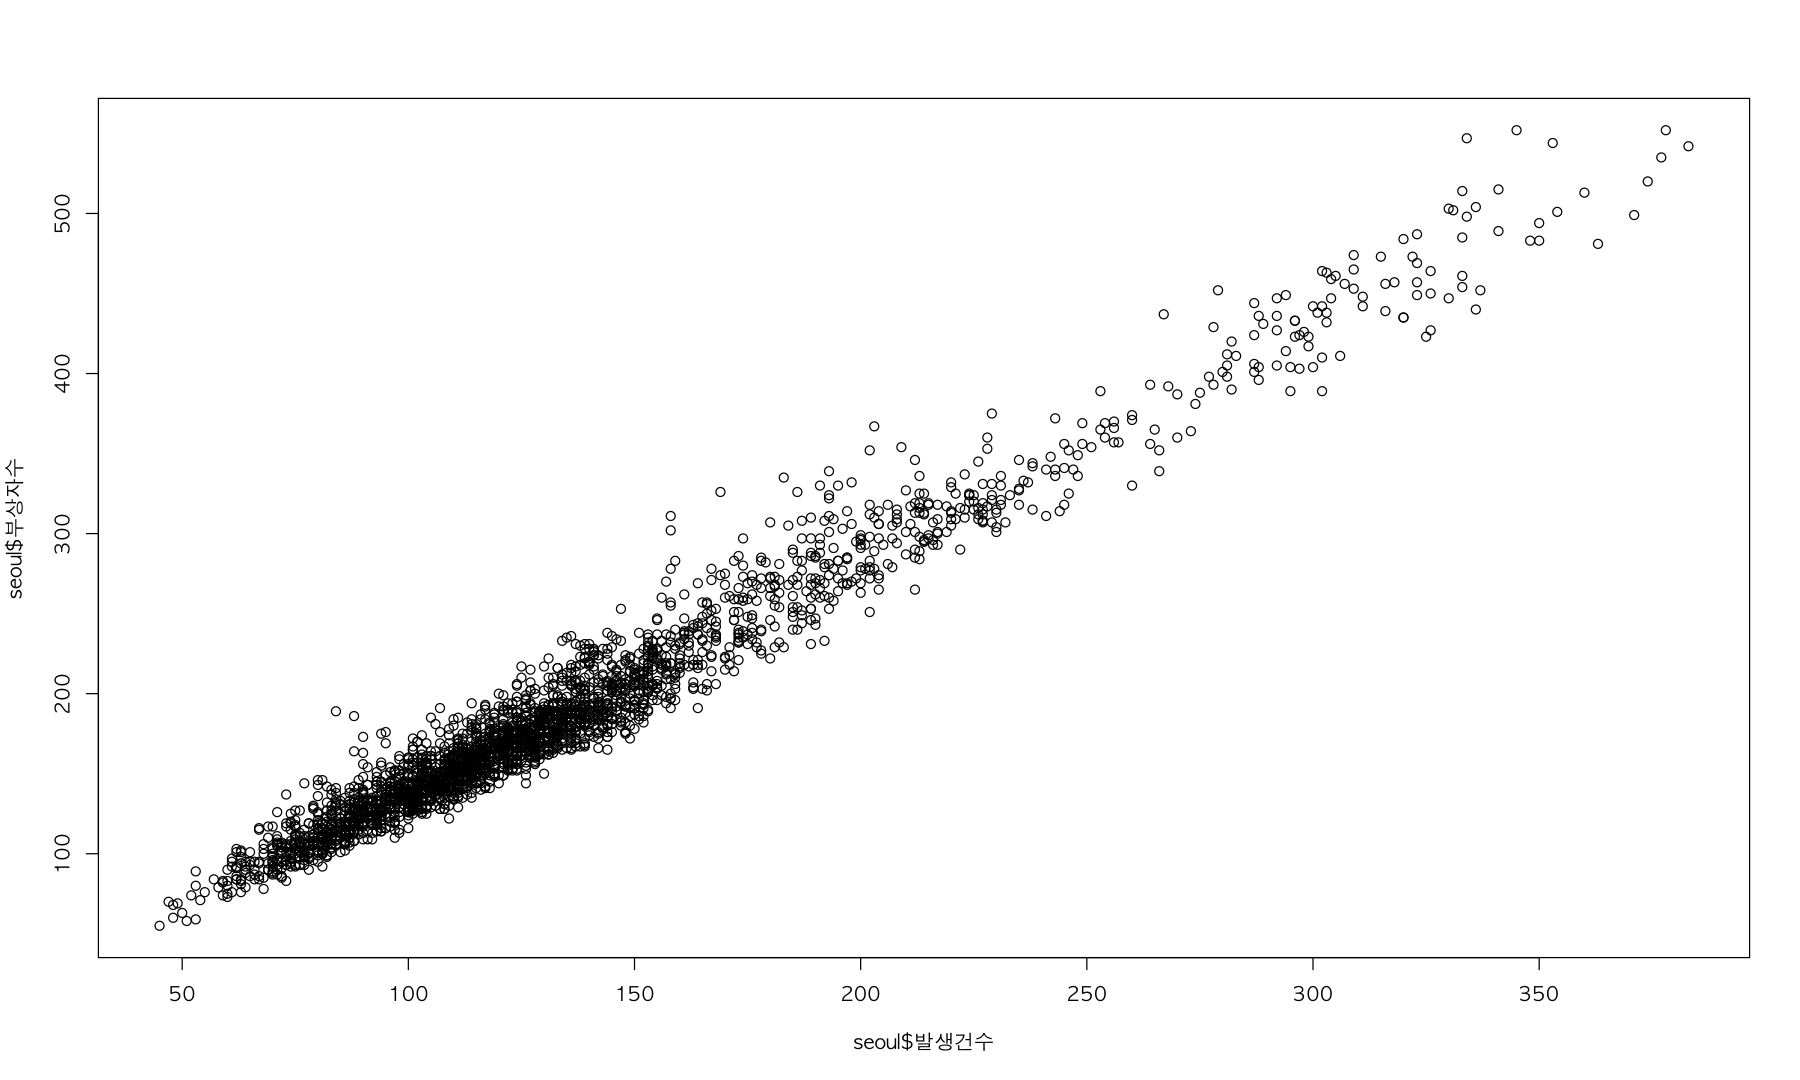

In [360]:
par(family ="AppleGothic",bg='white')
# 발생건수와 부상자수의 산포도 그리기
plot(seoul$`발생건수`,seoul$`부상자수`)

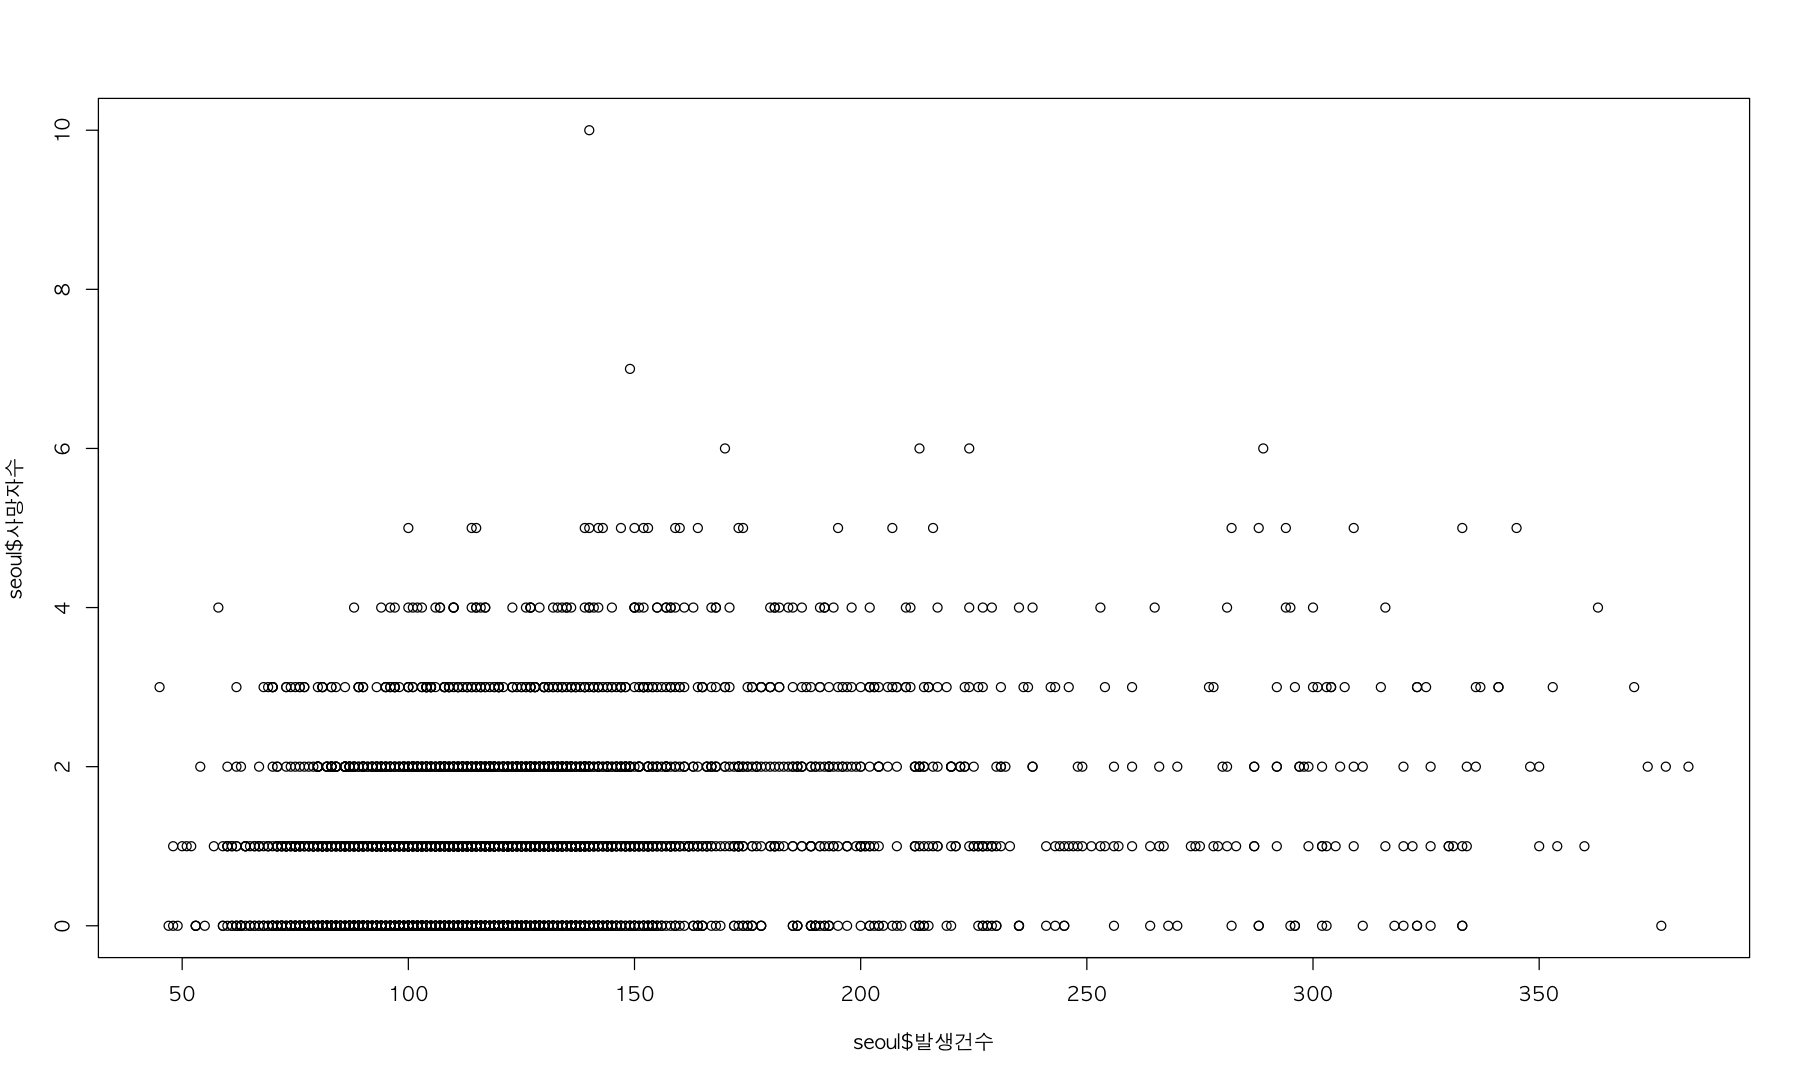

In [362]:
par(family ="AppleGothic",bg='white')
# 발생건수와 부상자수의 산포도 그리기
plot(seoul$`발생건수`,seoul$`사망자수`)



In [364]:
# 서울시 교통사고 사망자수에 대한 변동계수 구하기 

#평균
regionDeath.mean <- arrange(aggregate(사망자수~자치구명, seoul, mean), desc(사망자수)); regionDeath.mean
# 표준편차
regionDeath.sd <- arrange(aggregate(사망자수~자치구명, seoul, sd), desc(사망자수)); #regionInjure.sd
# 변동계수
regionDeath.cv <-round(regionDeath.sd[,2]/regionDeath.mean[,2] , 2) 
#DataFrame
regionDeath <- data.frame( 자치구명 =regionDeath.mean$자치구명,
                            변동계수 = regionDeath.cv); 
arrange(regionDeath, 변동계수)

자치구명 사망자수 
1  영등포구 2.0370370
2  강남구   1.7962963
3  송파구   1.7407407
4  강서구   1.5462963
5  서초구   1.5092593
6  동대문구 1.4814815
7  마포구   1.3611111
8  구로구   1.2962963
9  강동구   1.2870370
10 관악구   1.2870370
11 성북구   1.2037037
12 은평구   1.1388889
13 노원구   1.0925926
14 광진구   1.0833333
15 양천구   1.0740741
16 동작구   1.0277778
17 서대문구 1.0277778
18 용산구   0.9907407
19 성동구   0.9814815
20 금천구   0.9259259
21 강북구   0.9074074
22 중랑구   0.8888889
23 종로구   0.8518519
24 도봉구   0.8425926
25 중구     0.7870370

자치구명 변동계수
1  영등포구 0.71    
2  강남구   0.79    
3  송파구   0.81    
4  동대문구 0.87    
5  서초구   0.88    
6  강서구   0.90    
7  마포구   0.92    
8  강동구   0.92    
9  관악구   0.92    
10 성북구   0.93    
11 구로구   0.96    
12 서대문구 0.96    
13 은평구   0.97    
14 양천구   0.97    
15 노원구   1.00    
16 광진구   1.00    
17 동작구   1.00    
18 용산구   1.00    
19 성동구   1.00    
20 중구     1.01    
21 금천구   1.05    
22 강북구   1.05    
23 도봉구   1.06    
24 중랑구   1.07    
25 종로구   1.08